# 공공데이터 국민의료정보 분석해보기
* https://www.data.go.kr/tcs/eds/selectCoreDataListView.do
* 국가중점데이터 중 하나인 국민의료정보를 살펴봅니다.
* 처음으로 파일데이터에서 `건강보험심사평가원_전국 병의원 및 약국 현황_20210630`를 다운로드 받아봅니다.

## 필요한 라이브러리 불러오기
* https://pandas.pydata.org/
* https://numpy.org/
* https://seaborn.pydata.org/

In [1]:
# numpy는 고성능의 수치계산, 행렬이나 대규모 다차원 배열을 쉽게 처리하기 위한 라이브러리
# seaborn은 데이터 시각화를 위한 라이브러리
# matplotlib도 데이터 시각화를 위한 라이브러리
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화를 위한 폰트 설정

In [2]:
# Window의 한글폰트 설정
plt.rc( 'font' , family= 'Malgun Gothic' )
# 그래프가 노트북 안에 보이게 하기 위해 
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

## 데이터 로드하기
- 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
- 데이터를 로드해서 df라는 변수에 담습니다.
- 그리고 shape 을 통해 데이터의 갯수를 찍습니다. 결과는 (행,열) 순으로 출력됩니다.
- data 폴더에 받은 자료를 불러오기 위해서 ~/data를 입력하고 tab키를 누릅니다.
- 윈도우에서 엑셀로 파일을 열고 저장을 하면 cp949방식으로 저장을 하기 때문에 인코딩까지 해줍니다.
- mixed type이 있는 경우 low_memory = False를 지정해줍니다.

In [4]:
# read_csv로 불러온 파일을 df라는 변수에 담습니다.
df = pd.read_csv("C:/Users/dayun/data/1. 병원정보서비스 2021.6.csv", encoding = 'cp949')
df.shape

(74364, 29)

## 데이터 미리보기
- head, tail을 통해 데이터를 미리 볼 수 있습니다.
- ()안에서 Shift + Tab 키를 누르시면 docstring을 볼 수 있습니다.

In [5]:
# head로 데이터를 미리보기 합니다.
# ()안에서 Shift + Tab 키를 눌러보면 기본값이 5로 설정되어 있음을 알 수 있다.
df.head(3)

,암호화YKIHO코드,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,x좌표,y좌표
0,JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교인천성모병원,1,상급종합,220000,인천,220003,인천부평구,NaN,21431,...,1,0,0,2,0,0,0,0,126.724899,37.484831
1,JDQ4MTYyMiM1MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...,강릉아산병원,1,상급종합,320000,강원,320100,강릉시,NaN,25440,...,0,0,0,2,0,0,0,0,128.857841,37.818433
2,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,강북삼성병원,1,상급종합,110000,서울,110016,종로구,NaN,3181,...,3,0,0,4,0,0,0,0,126.967750,37.568408


In [6]:
# tail로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail(3)

,암호화YKIHO코드,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,x좌표,y좌표
74361,JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxMzUxIzUxIyQxIy...,힘찬마디한의원,93,한의원,110000,서울,110002,강동구,천호동,5329,...,0,0,0,0,1,0,0,0,127.126386,37.538123
74362,JDQ4MTg4MSM1MSMkMSMkNCMkMTMkMzgxNzAyIzUxIyQxIy...,힘찬세상경희한의원,93,한의원,110000,서울,110014,용산구,한강로2가,4376,...,0,0,0,0,0,0,0,1,126.968167,37.530005
74363,JDQ4MTg4MSM1MSMkMiMkOCMkMDAkMzgxMzUxIzExIyQyIy...,읻다의원,31,의원,110000,서울,110001,강남구,NaN,6012,...,0,0,0,0,0,0,0,0,NaN,NaN


In [7]:
# sample로 미리보기를 합니다.
df.sample()

,암호화YKIHO코드,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,읍면동,우편번호,...,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,x좌표,y좌표
23052,JDQ4MTYyMiM1MSMkMiMkMCMkMDAkNDgxOTYxIzExIyQxIy...,연세메디의원,31,의원,310000,경기,310702,안양동안구,NaN,13940,...,0,0,0,0,0,0,0,0,126.956873,37.403669


## 데이터 요약하기

### 요약정보

In [8]:
# info로 데이터의 요약을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74364 entries, 0 to 74363
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   암호화YKIHO코드  74364 non-null  object 
 1   요양기관명       74364 non-null  object 
 2   종별코드        74364 non-null  int64  
 3   종별코드명       74364 non-null  object 
 4   시도코드        74364 non-null  int64  
 5   시도코드명       74364 non-null  object 
 6   시군구코드       74364 non-null  int64  
 7   시군구코드명      74364 non-null  object 
 8   읍면동         31281 non-null  object 
 9   우편번호        74364 non-null  int64  
 10  주소          74364 non-null  object 
 11  전화번호        74055 non-null  object 
 12  병원URL       9099 non-null   object 
 13  개설일자        74348 non-null  object 
 14  총의사수        74364 non-null  int64  
 15  의과일반의 인원수   74364 non-null  int64  
 16  의과인턴 인원수    74364 non-null  int64  
 17  의과레지던트 인원수  74364 non-null  int64  
 18  의과전문의 인원수   74364 non-null  int64  
 19  치과일반의 인원수   74364 non-nul

### 컬럼명 보기

In [9]:
# 컬럼명만 출력해 봅니다.
df.columns

Index(['암호화YKIHO코드', '요양기관명', '종별코드', '종별코드명', '시도코드', '시도코드명', '시군구코드',
       '시군구코드명', '읍면동', '우편번호', '주소', '전화번호', '병원URL', '개설일자', '총의사수',
       '의과일반의 인원수', '의과인턴 인원수', '의과레지던트 인원수', '의과전문의 인원수', '치과일반의 인원수',
       '치과인턴 인원수', '치과레지던트 인원수', '치과전문의 인원수', '한방일반의 인원수', '한방인턴 인원수',
       '한방레지던트 인원수', '한방전문의 인원수', 'x좌표', 'y좌표'],
      dtype='object')

### 데이터 타입

In [10]:
# 데이터 타입만 출력합니다.
df.dtypes

암호화YKIHO코드     object
요양기관명          object
종별코드            int64
종별코드명          object
시도코드            int64
시도코드명          object
시군구코드           int64
시군구코드명         object
읍면동            object
우편번호            int64
주소             object
전화번호           object
병원URL          object
개설일자           object
총의사수            int64
의과일반의 인원수       int64
의과인턴 인원수        int64
의과레지던트 인원수      int64
의과전문의 인원수       int64
치과일반의 인원수       int64
치과인턴 인원수        int64
치과레지던트 인원수      int64
치과전문의 인원수       int64
한방일반의 인원수       int64
한방인턴 인원수        int64
한방레지던트 인원수      int64
한방전문의 인원수       int64
x좌표           float64
y좌표           float64
dtype: object

## 결측치

In [11]:
True == 1

True

In [12]:
# 결측치를 확인할 때는 df.isnull()로 T/F 값을 확인한다. 
null_count = df.isnull().sum()
null_count

암호화YKIHO코드        0
요양기관명             0
종별코드              0
종별코드명             0
시도코드              0
시도코드명             0
시군구코드             0
시군구코드명            0
읍면동           43083
우편번호              0
주소                0
전화번호            309
병원URL         65265
개설일자             16
총의사수              0
의과일반의 인원수         0
의과인턴 인원수          0
의과레지던트 인원수        0
의과전문의 인원수         0
치과일반의 인원수         0
치과인턴 인원수          0
치과레지던트 인원수        0
치과전문의 인원수         0
한방일반의 인원수         0
한방인턴 인원수          0
한방레지던트 인원수        0
한방전문의 인원수         0
x좌표            3450
y좌표            3450
dtype: int64

<AxesSubplot:>

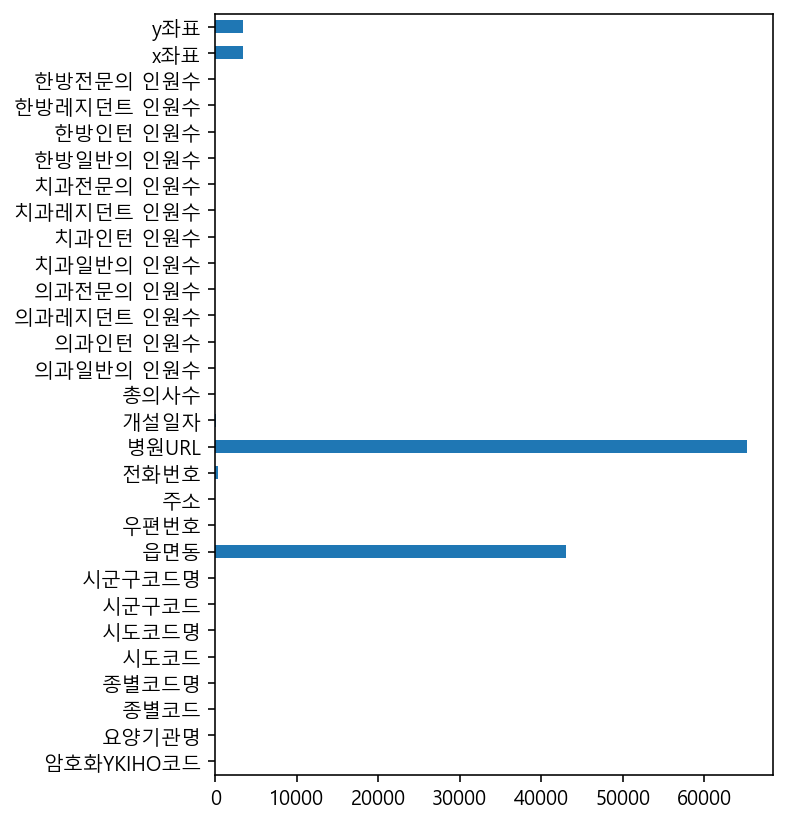

In [13]:
# 위에서 구한 결측치(null_count)를 .plot.bar를 통해 막대그래프로 표현합니다.
# .plot.barh를 사용하면 bar 그래프의 x,y축을 바꿔서 그려준다.
# figsize = (a,b)를 괄호 안에 넣어서 y축의 글자간격을 조절할 수 있다.

null_count.plot.barh(figsize = (5,7))

In [14]:
# 위에서 계산한 결측치 수를 reset_index를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head로 미리보기를 합니다.

df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,암호화YKIHO코드,0
1,요양기관명,0
2,종별코드,0
3,종별코드명,0
4,시도코드,0


## 컬럼명 변경하기

In [15]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치수"로 변경해 줍니다.

df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,암호화YKIHO코드,0
1,요양기관명,0
2,종별코드,0
3,종별코드명,0
4,시도코드,0


## 정렬하기

In [16]:
# df_null_count 데이터프레임에 있는 결측치수 컬럼을 sort_values를 통해 정렬해서 
# 결측치가 많은 순으로 상위 10개만 출력합니다.

df_null_count_top = df_null_count.sort_values(by = "결측치수", ascending=False).head(10)
df_null_count_top

,컬럼명,결측치수
12,병원URL,65265
8,읍면동,43083
28,y좌표,3450
27,x좌표,3450
11,전화번호,309
13,개설일자,16
17,의과레지던트 인원수,0
26,한방전문의 인원수,0
25,한방레지던트 인원수,0
24,한방인턴 인원수,0


## 특정 컬럼만 불러오기

In [17]:
# 병원URL 컬럼을 불러옵니다.
# NaN == Not a Number의 약자로 결측치를 의미합니다.

df["병원URL"].head()

0    http://www.cmcism.or.kr/
1       http://www.gnah.co.kr
2      http://www.kbsmc.co.kr
3        http://www.kuh.ac.kr
4      http://knumc.knu.ac.kr
Name: 병원URL, dtype: object

In [18]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다.
# .tolist는 리스트 형태로 변경해준다.

drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['병원URL',
 '읍면동',
 'y좌표',
 'x좌표',
 '전화번호',
 '개설일자',
 '의과레지던트 인원수',
 '한방전문의 인원수',
 '한방레지던트 인원수',
 '한방인턴 인원수']

In [19]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.

df[drop_columns].head()

,병원URL,읍면동,y좌표,x좌표,전화번호,개설일자,의과레지던트 인원수,한방전문의 인원수,한방레지던트 인원수,한방인턴 인원수
0,http://www.cmcism.or.kr/,NaN,37.484831,126.724899,032-1544-9004,1981-08-06,68,0,0,0
1,http://www.gnah.co.kr,NaN,37.818433,128.857841,033-610-3114,1996-07-30,41,0,0,0
2,http://www.kbsmc.co.kr,NaN,37.568408,126.967750,02-2001-2001,1979-03-24,134,0,0,0
3,http://www.kuh.ac.kr,NaN,37.540376,127.071828,1588-1533,1982-11-16,155,0,0,0
4,http://knumc.knu.ac.kr,NaN,35.866774,128.604125,053-200-5114,1910-09-07,195,0,0,0


## 제거하기

In [20]:
# 이후에 있을 데이터 분석에 경도 = x좌표, 위도 = y좌표를 이용하기 위해서
# 이 분석의 경우 결측치가 있는 컬럼 중 '병원URL' 과 '읍면동'컬럼만 삭제한다.

df = df.drop(columns = ['병원URL','읍면동'] )

In [21]:
# 제거 결과를 info로 확인합니다.
# 이전에는 컬럼 수가 29개였지만 2개의 컬럼을 삭제하고 27개가 된 것을 확인할 수 있다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74364 entries, 0 to 74363
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   암호화YKIHO코드  74364 non-null  object 
 1   요양기관명       74364 non-null  object 
 2   종별코드        74364 non-null  int64  
 3   종별코드명       74364 non-null  object 
 4   시도코드        74364 non-null  int64  
 5   시도코드명       74364 non-null  object 
 6   시군구코드       74364 non-null  int64  
 7   시군구코드명      74364 non-null  object 
 8   우편번호        74364 non-null  int64  
 9   주소          74364 non-null  object 
 10  전화번호        74055 non-null  object 
 11  개설일자        74348 non-null  object 
 12  총의사수        74364 non-null  int64  
 13  의과일반의 인원수   74364 non-null  int64  
 14  의과인턴 인원수    74364 non-null  int64  
 15  의과레지던트 인원수  74364 non-null  int64  
 16  의과전문의 인원수   74364 non-null  int64  
 17  치과일반의 인원수   74364 non-null  int64  
 18  치과인턴 인원수    74364 non-null  int64  
 19  치과레지던트 인원수  74364 non-nul

## 기초 통계값 보기 

### 기초 통계 수치

In [22]:
# 평균값
# 위도 = y좌표, 경도 = x좌표를 의미한다.

df["y좌표"].mean()

36.63462346855301

In [23]:
# 중앙값

df["y좌표"].median()

37.2463231

In [24]:
# 최대값

df["y좌표"].max()

38.5389924

In [25]:
# 최솟값

df["y좌표"].min()

33.1165291

In [26]:
# 갯수

df["y좌표"].count()

70914

### 기초통계값 요약하기 - describe
- describe 를 사용하면 데이터를 요약해 볼 수 있습니다. 기본적으로 수치형 데이터를 요약해서 보여줍니다. 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수=중앙값(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

In [27]:
# y좌표 = 위도를 describe로 요약해봅니다.

df["y좌표"].describe()

count    70914.000000
mean        36.634623
std          1.049799
min         33.116529
25%         35.814819
50%         37.246323
75%         37.515765
max         38.538992
Name: y좌표, dtype: float64

In [28]:
# 2개의 컬럼을 describe로 요약합니다.
# 2개 이상의 컬럼을 가져올 때는 리스트 형태의 자료구조로 가져와야한다.

df[["y좌표","x좌표"]].describe()

,y좌표,x좌표
count,70914.000000,70914.000000
mean,36.634623,127.485896
std,1.049799,0.839266
min,33.116529,124.653081
25%,35.814819,126.917622
50%,37.246323,127.087415
75%,37.515765,128.107597
max,38.538992,130.908451


In [29]:
# describe로 문자열 데이터타입의 요약을 봅니다.
# include = number를 사용할 경우 수치형데이터만, object를 사용할 경우 문자열데이터만 추출한다.
# top은 가장 많이 등장하는 값, freq는 빈도수를 의미한다. 

df.describe(include = "object")

,암호화YKIHO코드,요양기관명,종별코드명,시도코드명,시군구코드명,주소,전화번호,개설일자
count,74364,74364,74364,74364,74364,74364,74055,74348
unique,74364,50056,15,17,250,70927,73689,11673
top,JDQ4MTg4MSM1MSMkMiMkNCMkMDAkNTgxOTYxIzUxIyQxIy...,경희한의원,의원,서울,강남구,"경상남도 창원시 성산구 동산로 124 (상남동, 성원그랜드쇼핑)",1544-0377,1988-01-01
freq,1,118,33597,18183,2741,16,12,219


### 중복제거한 값 보기
- unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 세어봅니다.

In [30]:
# 종별코드명

df["종별코드명"].unique()

array(['상급종합', '종합병원', '병원', '요양병원', '정신병원', '의원', '치과병원', '치과의원', '조산원',
       '보건소', '보건지소', '보건진료소', '보건의료원', '한방병원', '한의원'], dtype=object)

In [31]:
df["종별코드명"].nunique()

15

In [32]:
# 시도코드명

df["시도코드명"].unique()

array(['인천', '강원', '서울', '대구', '경남', '경기', '충남', '부산', '전북', '광주', '대전',
       '충북', '울산', '전남', '경북', '세종시', '제주'], dtype=object)

In [33]:
df["시도코드명"].nunique()

17

In [34]:
# 시군구코드명

df["시군구코드명"].unique()

array(['인천부평구', '강릉시', '종로구', '광진구', '대구중구', '진주시', '동대문구', '대구달서구',
       '구로구', '안산단원구', '천안동남구', '대구남구', '부산서구', '성남분당구', '강남구', '부천시',
       '수원영통구', '양산시', '원주시', '익산시', '인천남동구', '양천구', '부산진구', '인천중구',
       '송파구', '광주동구', '전주덕진구', '동작구', '대전중구', '청주서원구', '대구북구', '성북구',
       '울산동구', '서초구', '창원마산회원구', '서대문구', '안양동안구', '성동구', '화순군', '인천연수구',
       '용인처인구', '대구수성구', '광주광산구', '인천서구', '수원팔달구', '영등포구', '은평구', '의정부시',
       '용인기흥구', '강동구', '춘천시', '삼척시', '영월군', '속초시', '김해시', '충주시', '수원장안구',
       '안성시', '이천시', '파주시', '포천시', '창원마산합포구', '김천시', '안동시', '포항북구', '광명시',
       '광양시', '광주남구', '광주북구', '광주서구', '구미시', '부산북구', '고양일산동구', '중구',
       '대전대덕구', '순천시', '창원성산구', '태백시', '안산상록구', '나주시', '남양주시', '노원구',
       '중랑구', '당진시', '대구서구', '대구동구', '부산동래구', '대전동구', '대전서구', '경주시',
       '부산기장군', '목포시', '강서구', '부산연제구', '부산남구', '부안군', '인천강화군', '부산수영구',
       '상주시', '통영시', '서산시', '울산울주군', '성남수정구', '성남중원구', '세종시', '용산구',
       '아산시', '포항남구', '관악구', '여수시', '창원진해구', '영광군', '영천시', '부산영도구', '영주시',
 

In [35]:
df["시군구코드명"].nunique()

250

In [36]:
# nunique 대신 len을 사용할 수도 있습니다.

len(df["시군구코드명"].unique())

250

### 그룹화된 요약값 보기 - value_counts
- value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.

In [37]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.
# 시도코드명을 세어봅니다.

city = df["시도코드명"].value_counts()
city

서울     18183
경기     16233
부산      5349
경남      4171
대구      3912
인천      3496
경북      3393
전북      2900
충남      2745
전남      2622
대전      2304
광주      2215
충북      2153
강원      1907
울산      1408
제주       971
세종시      402
Name: 시도코드명, dtype: int64

In [38]:
# normalize=True 옵션을 사용하면 비율을 구할 수 있습니다.

city_normalize = df["시도코드명"].value_counts(normalize = True)
city_normalize

서울     0.244513
경기     0.218291
부산     0.071930
경남     0.056089
대구     0.052606
인천     0.047012
경북     0.045627
전북     0.038997
충남     0.036913
전남     0.035259
대전     0.030983
광주     0.029786
충북     0.028952
강원     0.025644
울산     0.018934
제주     0.013057
세종시    0.005406
Name: 시도코드명, dtype: float64

<AxesSubplot:>

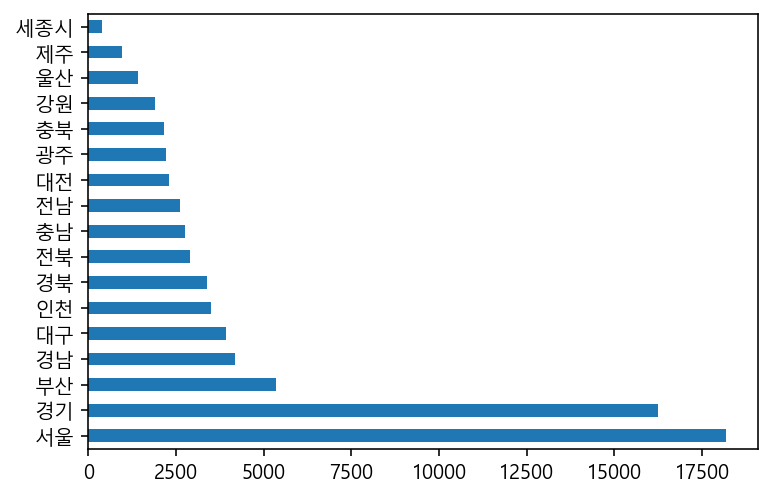

In [39]:
# Pandas에서는 plot 기능을 내장하고 있습니다.
# 위에서 분석한 시도코드명 수를 막대그래프로 표현해봅니다.

city.plot.barh()

<AxesSubplot:ylabel='시도코드명'>

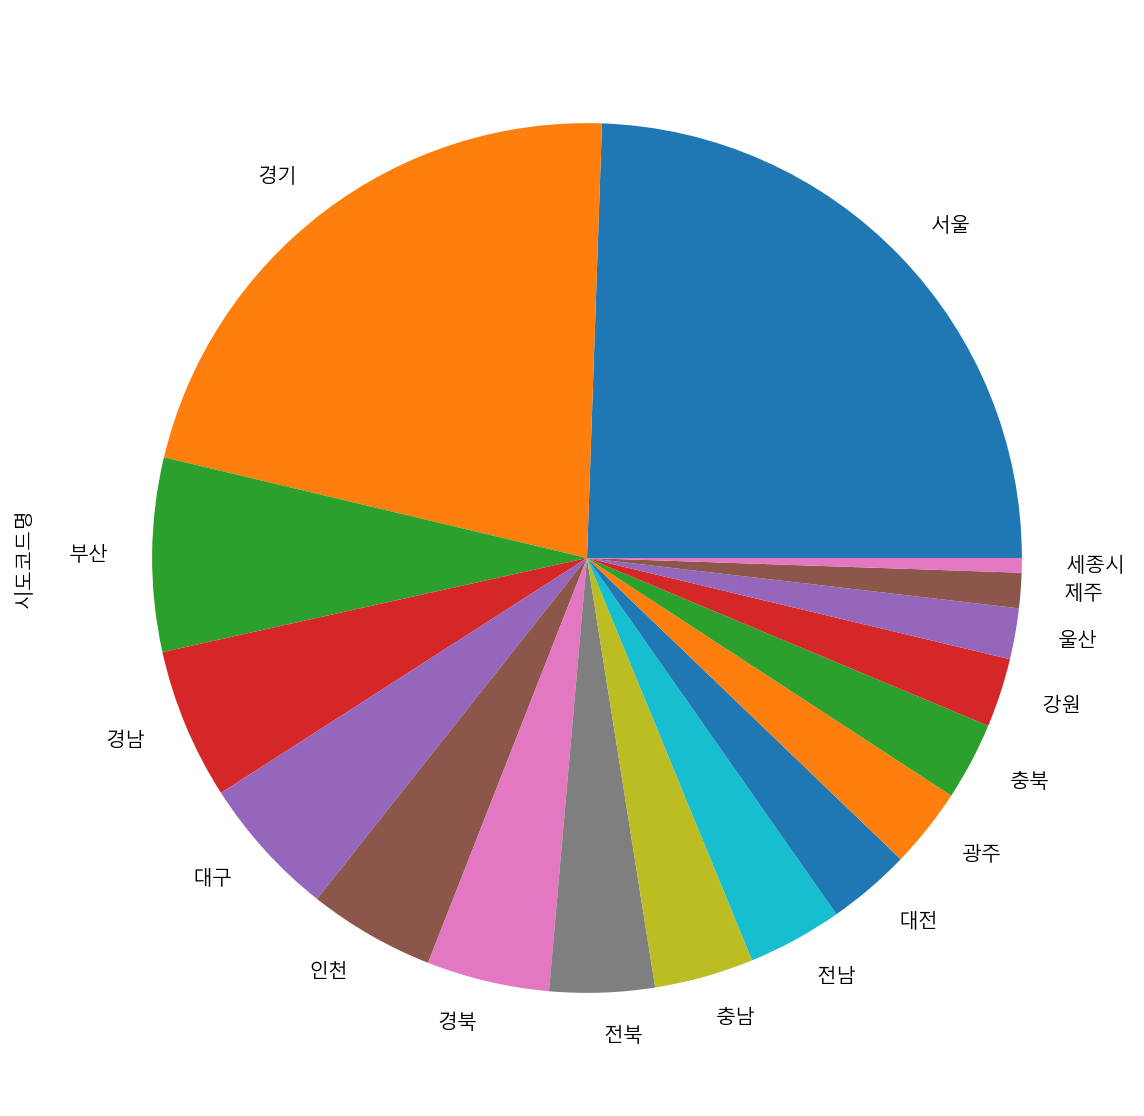

In [40]:
# Pandas의 plot.pie()를 사용해서 파이그래프를 그려봅니다.

city_normalize.plot.pie(figsize = (10,10))

<AxesSubplot:xlabel='count', ylabel='시도코드명'>

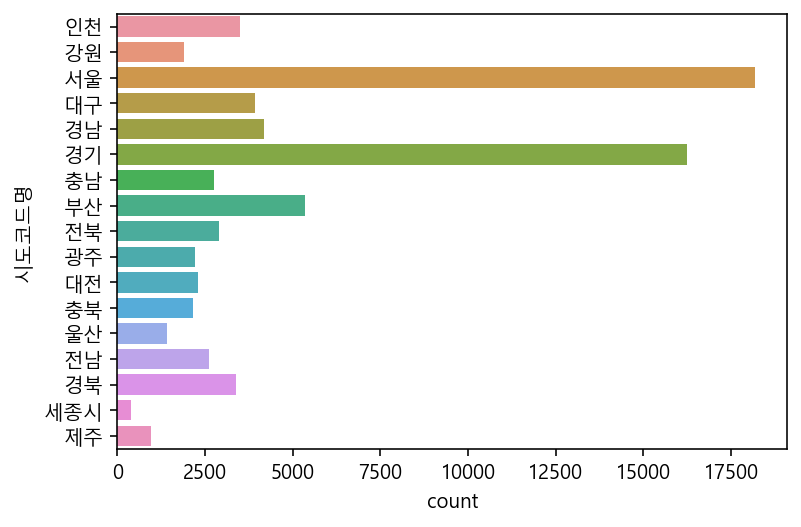

In [41]:
# seaborn의 countplot으로 그려봅니다.

sns.countplot(data = df, y = "시도코드명")

In [42]:
# 종별코드명으로 갯수를 세어봅니다.

c = df["종별코드명"].value_counts()
c

의원       33597
치과의원     18490
한의원      14618
보건진료소     1905
요양병원      1474
병원        1413
보건지소      1319
한방병원       443
종합병원       319
보건소        243
치과병원       237
정신병원       229
상급종합        45
조산원         17
보건의료원       15
Name: 종별코드명, dtype: int64

In [43]:
# 시군구코드명으로 갯수를 세어봅니다.

df["시군구코드명"].value_counts()

강남구      2741
서초구      1279
송파구      1215
부천시      1110
성남분당구     965
         ... 
양구군        25
양양군        24
영양군        21
울릉군         9
인천남구        1
Name: 시군구코드명, Length: 250, dtype: int64

In [44]:
# normalize=True 를 사용해 비율을 구해봅니다.

n = df["종별코드명"].value_counts(normalize = True)
n

의원       0.451791
치과의원     0.248642
한의원      0.196574
보건진료소    0.025617
요양병원     0.019821
병원       0.019001
보건지소     0.017737
한방병원     0.005957
종합병원     0.004290
보건소      0.003268
치과병원     0.003187
정신병원     0.003079
상급종합     0.000605
조산원      0.000229
보건의료원    0.000202
Name: 종별코드명, dtype: float64

<AxesSubplot:>

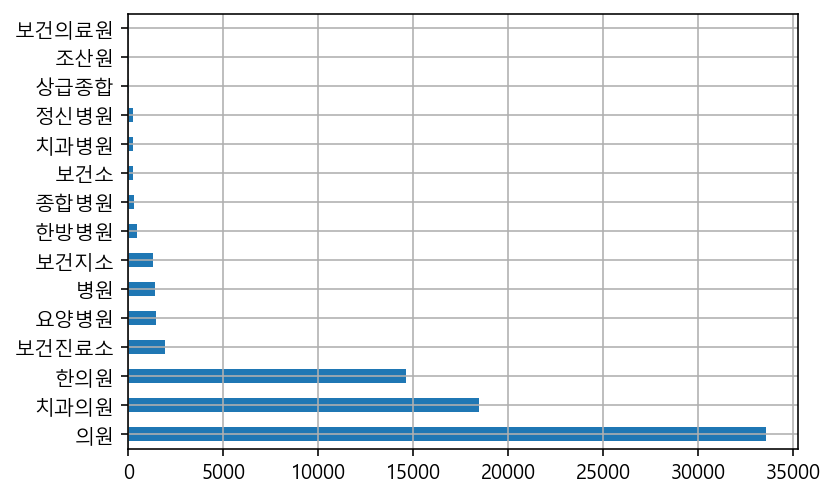

In [45]:
# Pandas의 plot.barh()를 사용해서 막대그래프를 그려봅니다.
# grid = True를 통해서 격자를 추가합니다.

c.plot.barh(grid = True)

<AxesSubplot:ylabel='종별코드명'>

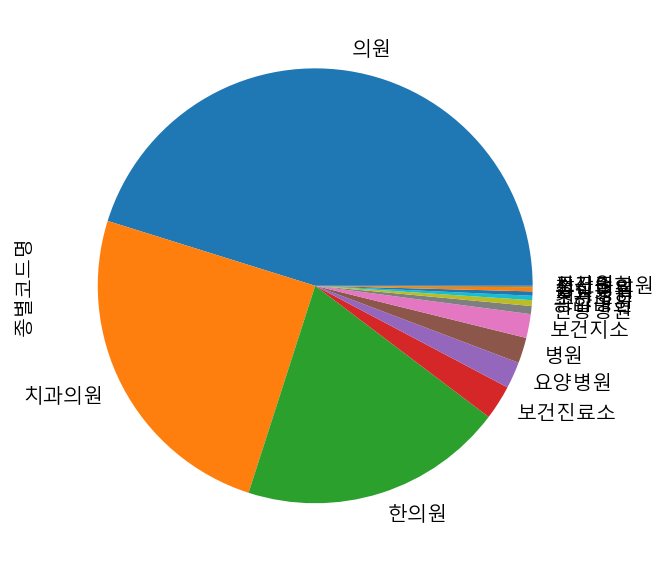

In [46]:
# Pandas의 plot.pie()를 사용해서 파이그래프를 그려봅니다.

c.plot.pie(figsize = (11,5))

## 데이터 색인하기
- 특정 데이터만 모아서 따로 봅니다.

In [47]:
# "종별코드명"이 "치과의원"인 데이터만 가져와서
# df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.
# copy 후에 df_medical의 값이 바뀌더라도 원본 df에는 영향이 없다.

df_medical = df[df["종별코드명"] == "치과의원"].copy()
df_medical.head(1)

,암호화YKIHO코드,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,우편번호,주소,...,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,x좌표,y좌표
37313,JDQ4MTg4MSM1MSMkMSMkMCMkNzIkNTgxMzUxIzExIyQxIy...,(사)누가선교회 누가플러스치과의원,51,치과의원,110000,서울,110013,영등포구,7213,"서울특별시 영등포구 양평로 67 2층 (당산동5가, 한강포스빌)",...,1,0,0,0,0,0,0,0,126.899314,37.534927


In [48]:
# "시도코드명"에서 "서울"만 가져옵니다.
# df.loc를 사용하면 행,열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "시군구코드명"만 가져옵니다.
# 그리고 가져온 결과를 value_counts를 통해 시군구코드의 갯수를 세어봅니다. 

s = df["시도코드명"] == "서울"
df.loc[s, "시군구코드명"].value_counts()

강남구     2741
서초구     1279
송파구     1215
강서구      880
강동구      844
영등포구     794
마포구      761
노원구      747
관악구      706
은평구      686
양천구      649
동작구      601
동대문구     597
구로구      574
중구       572
광진구      558
성북구      539
중랑구      539
종로구      496
강북구      468
성동구      457
서대문구     437
도봉구      370
금천구      354
용산구      319
Name: 시군구코드명, dtype: int64

In [ ]:
# 위와 똑같은 기능을 수행하는 코드입니다. 아래와 같이 한 줄에 표현할 수도 있습니다.
#df.loc[df["시도코드명"] == "서울", "시군구코드명"].value_counts()

In [49]:
# 강남구만 따로 모아봅니다. 

df_gangnam = df[df["시군구코드명"] == "강남구"]
df_gangnam.shape

(2741, 27)

In [50]:
# 요양기관명을 그룹화해서 갯수를 세어봅니다.
# value_counts를 사용해서 상위 10개를 출력합니다.
# 메소드체이닝을 사용합니다.

df["요양기관명"].value_counts().head(10)

경희한의원      118
서울치과의원      98
연세치과의원      85
우리치과의원      80
이사랑치과의원     73
현대치과의원      68
우리한의원       66
굿모닝치과의원     65
유디치과의원      61
이편한치과의원     61
Name: 요양기관명, dtype: int64

In [51]:
# 강남구만 df_gangnam 변수에 담겨져 있습니다.
# df_gangnam 변수에서 요양기관명으로 갯수를 세어봅니다.
# 가장 많은 요양기관명 상위 10개를 출력합니다.

df_gangnam["요양기관명"].value_counts().head(10)

미고성형외과의원      2
정치과의원         2
바른나무치과의원      2
신소애여성의원       1
제이유피부과의원      1
세민성형외과의원      1
조성형외과의원       1
다움산부인과의원      1
더니버스성형외과의원    1
밀라노의원         1
Name: 요양기관명, dtype: int64

### 여러 조건으로 색인하기

In [52]:
# "종별코드명"이 "치과의원"인 것과
# "시도코드명"이 "서울"인 것만 가져옵니다.
# Pandas에서 and 조건을 입력하기 위해서는 & 연산자를 사용하여야 하고, 연산자 우선순위 표시를 위해 ()로 묶어주어야 한다.
# and == & , or == \ 
# print 구문을 통해서 중간에 있는 코드도 출력할 수 있다.

df_seoul_dental = df[(df["종별코드명"] == "치과의원") & (df["시도코드명"] == "서울")]
print(df_seoul_dental.shape)
df_seoul_dental.head(1)

(4906, 27)


,암호화YKIHO코드,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,우편번호,주소,...,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,x좌표,y좌표
37313,JDQ4MTg4MSM1MSMkMSMkMCMkNzIkNTgxMzUxIzExIyQxIy...,(사)누가선교회 누가플러스치과의원,51,치과의원,110000,서울,110013,영등포구,7213,"서울특별시 영등포구 양평로 67 2층 (당산동5가, 한강포스빌)",...,1,0,0,0,0,0,0,0,126.899314,37.534927


### 구별로 보기

In [53]:
# 위에서 색인한 데이터로 "시군구코드명"으로 그룹화 해서 갯수를 세어봅니다.
# 구별로 치과의원이 몇개가 있는지 확인해봅니다. 

c = df_seoul_dental["시군구코드명"].value_counts()
c.head()

강남구     551
송파구     329
서초구     314
영등포구    242
강동구     232
Name: 시군구코드명, dtype: int64

In [54]:
# normalize=True 를 사용해 비율을 구해봅니다.

n = df_seoul_dental["시군구코드명"].value_counts(normalize=True)
n.head()

강남구     0.112311
송파구     0.067061
서초구     0.064003
영등포구    0.049327
강동구     0.047289
Name: 시군구코드명, dtype: float64

<AxesSubplot:>

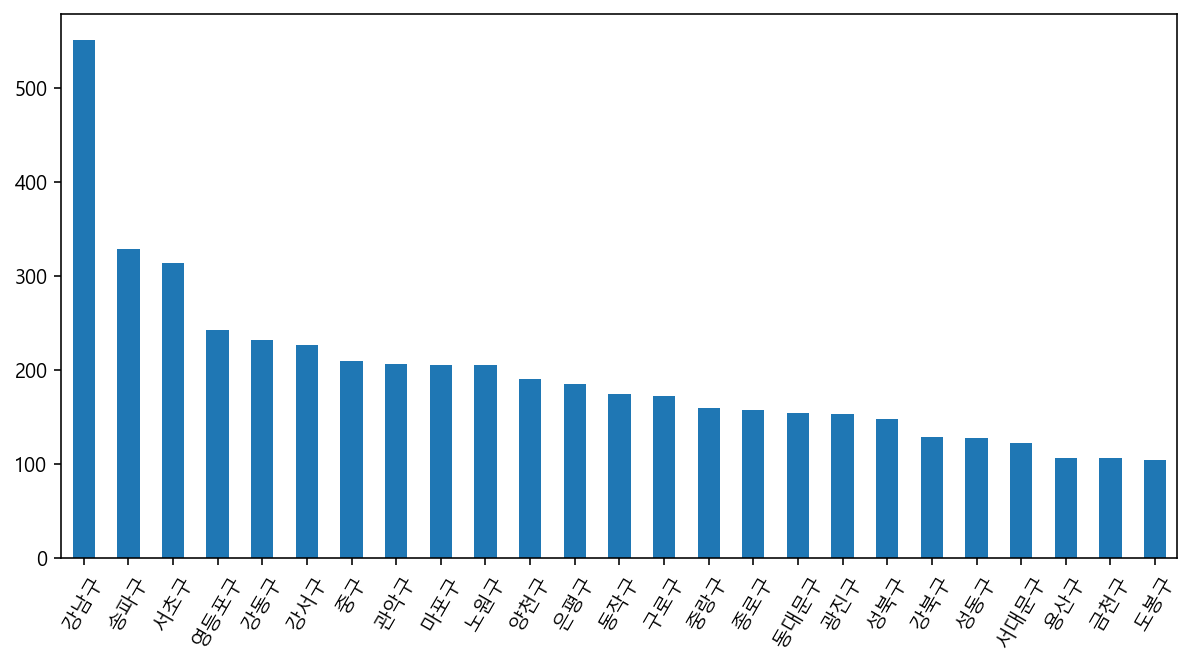

In [55]:
# 위에서 구한 결과를 Pandas의 plot.bar()를 활용해 막대그래프로 그립니다.
# rot를 통해 x축의 글씨 기울기를 조절합니다.

c.plot.bar(figsize = (10,5), rot = 60)

In [56]:
# "종별코드명"이 "종합병원"인 것과
# "시도코드명"이 "서울"인 것만 가져옵니다.
# 결과를 df_seoul_hospital에 할당해서 재사용합니다.

df_seoul_hospital = df[(df["종별코드명"] == "종합병원") & (df["시도코드명"] == "서울")].copy()
df_seoul_hospital

,암호화YKIHO코드,요양기관명,종별코드,종별코드명,시도코드,시도코드명,시군구코드,시군구코드명,우편번호,주소,...,치과일반의 인원수,치과인턴 인원수,치과레지던트 인원수,치과전문의 인원수,한방일반의 인원수,한방인턴 인원수,한방레지던트 인원수,한방전문의 인원수,x좌표,y좌표
51,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교 여의도성모병원,11,종합병원,110000,서울,110013,영등포구,7345,서울특별시 영등포구 63로 10 여의도성모병원 (여의도동),...,0,0,0,3,0,0,0,0,126.936752,37.518325
52,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,가톨릭대학교 은평성모병원,11,종합병원,110000,서울,110015,은평구,3312,서울특별시 은평구 통일로 1021 (진관동),...,0,0,0,3,0,0,0,0,126.916191,37.633494
56,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,강동경희대학교의대병원,11,종합병원,110000,서울,110002,강동구,5278,서울특별시 강동구 동남로 892 (상일동),...,0,0,0,1,0,0,0,0,127.157379,37.553448
76,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,경찰병원,11,종합병원,110000,서울,110018,송파구,5715,서울특별시 송파구 송이로 123 국립경찰병원 (가락동),...,1,0,0,2,0,0,0,0,127.123509,37.496384
91,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQyIy...,구로성심병원,11,종합병원,110000,서울,110005,구로구,8223,서울특별시 구로구 경인로 427 구로성심병원 (고척동),...,0,0,0,0,0,0,0,0,126.866416,37.499672
96,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQyIy...,국립중앙의료원,11,종합병원,110000,서울,110017,중구,4564,서울특별시 중구 을지로 245 (을지로6가),...,0,0,0,4,0,0,0,4,127.005671,37.567214
108,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,노원을지대학교병원,11,종합병원,110000,서울,110022,노원구,1830,서울특별시 노원구 한글비석로 68 을지병원 (하계동),...,1,0,0,2,0,0,0,0,127.069935,37.636479
109,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,녹색병원,11,종합병원,110000,서울,110019,중랑구,2221,서울특별시 중랑구 사가정로49길 53 (면목동),...,0,0,0,0,0,0,0,0,127.086074,37.583573
115,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,대림성모병원,11,종합병원,110000,서울,110013,영등포구,7442,"서울특별시 영등포구 시흥대로 657 (대림동, 대림성모병원)",...,1,0,0,0,0,0,0,0,126.907221,37.490698
129,JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...,명지성모병원,11,종합병원,110000,서울,110013,영등포구,7417,서울특별시 영등포구 도림로 156 명지성모병원 (대림동),...,0,0,0,0,0,0,0,0,126.899278,37.493883


In [57]:
# "시군구코드명" 으로 그룹화해서 구별로 종합병원의 수를 세어봅니다.
df_seoul_hospital["시군구코드명"].value_counts()

영등포구    7
강서구     4
강동구     3
중랑구     3
노원구     3
동대문구    3
양천구     2
중구      2
종로구     2
은평구     2
강북구     1
금천구     1
관악구     1
구로구     1
도봉구     1
동작구     1
서대문구    1
강남구     1
광진구     1
용산구     1
송파구     1
Name: 시군구코드명, dtype: int64

### 텍스트데이터 색인하기 
- 텍스트 데이터 전처리를 위한 과정
- 1) 요양기관명에서 특정 단어(ex.성모)가 들어가는 데이터만 가져오고 싶을 때 
- df_seoul_hospital[df_seoul_hospital["요양기관명"].str.contains(성모)]
- 2) 특정 단어간 들어간 행을 제거하고 싶다면
- drop_row = df_seoul_hospital[df_seoul_hospital["요양기관명"].str.contains(성모)]
- drop_row = drop_row.tolist()
- df_seoul_hospital.drop(drop_row, axis = 0)

In [58]:
# 텍스트 데이터 전처리 후 분석하고자 하는 데이터의 "요양기관명"을 확인 

df_seoul_hospital["요양기관명"].unique()

array(['가톨릭대학교 여의도성모병원', '가톨릭대학교 은평성모병원', '강동경희대학교의대병원', '경찰병원', '구로성심병원',
       '국립중앙의료원', '노원을지대학교병원', '녹색병원', '대림성모병원', '명지성모병원', '미즈메디병원',
       '부민병원', '삼육서울병원', '서울성심병원', '서울적십자병원', '서울특별시 동부병원', '서울특별시보라매병원',
       '서울특별시서남병원', '서울특별시서울의료원', '성심의료재단강동성심병원', '성애의료재단 성애병원', '세란병원',
       '순천향대학교 부속 서울병원', '씨엠병원', '에이치플러스 양지병원', '우리들병원', '의료법인 청구성심병원',
       '의료법인동신의료재단 동신병원', '의료법인성화의료재단  대한병원', '의료법인풍산의료재단동부제일병원',
       '의료법인한전의료재단 한일병원', '이화여자대학교의과대학부속서울병원', '인제대학교 상계백병원',
       '인제대학교 서울백병원', '차의과학대학교 강남차병원', '한국보훈복지의료공단 중앙보훈병원',
       '한국원자력의학원원자력병원', '한림대학교 강남성심병원', '한림대학교 한강성심병원', '혜민병원', '홍익병원',
       '희명병원'], dtype=object)

<AxesSubplot:>

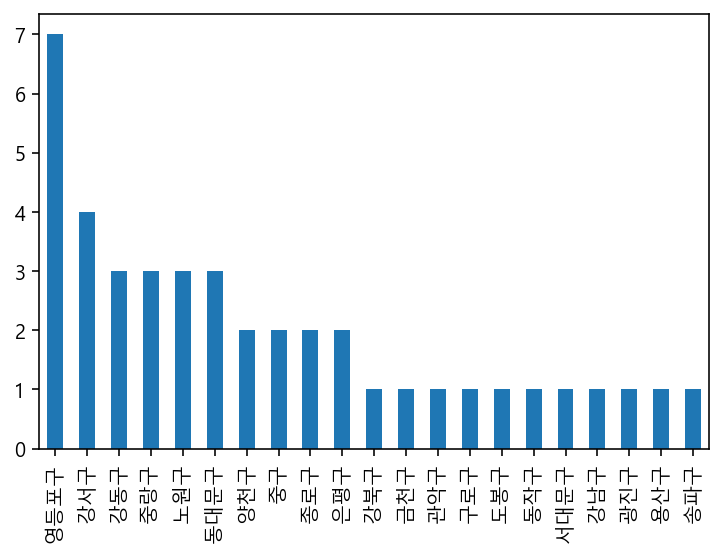

In [59]:
df_seoul_hospital["시군구코드명"].value_counts().plot.bar()

<AxesSubplot:xlabel='시군구코드명', ylabel='count'>

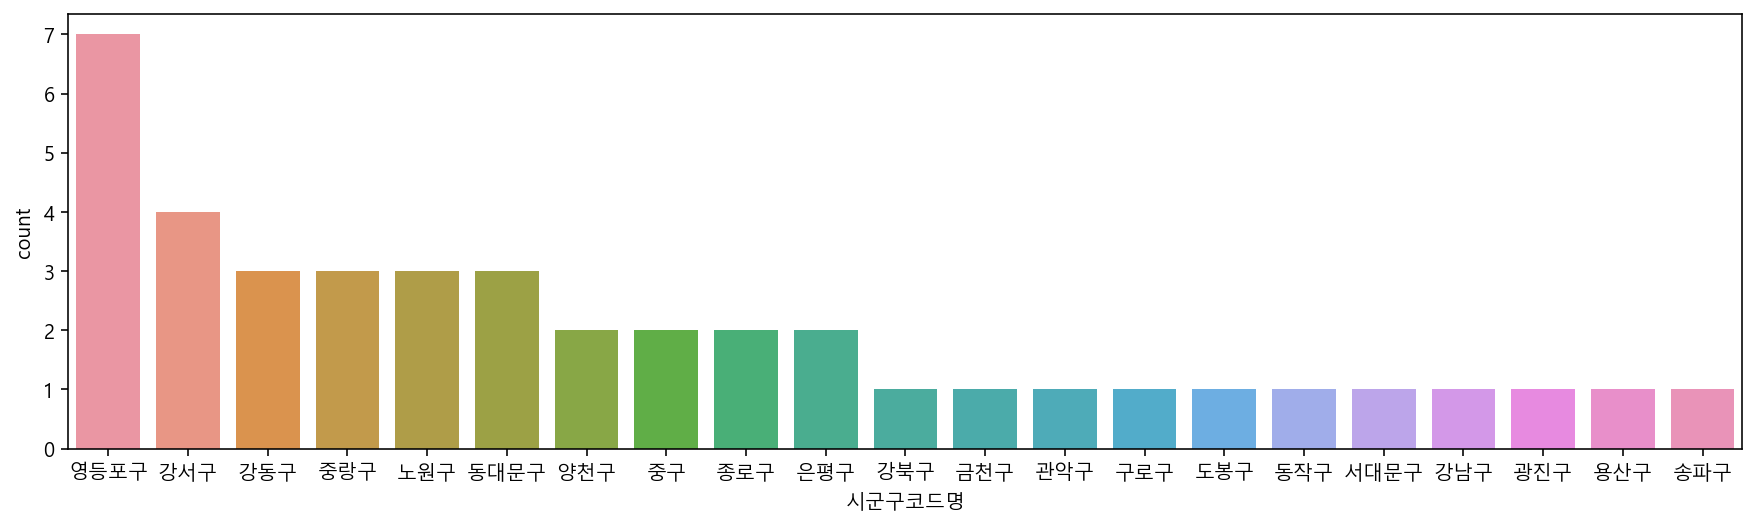

In [60]:
# 시군구코드명에 따라 종합병원의 숫자를 countplot으로 그립니다.
# 그래프의 사이즈 조절
plt.figure(figsize = (15,4))
# 숫자가 많은 순서대로 정렬을 추가
sns.countplot(data = df_seoul_hospital, x = "시군구코드명" 
              , order = df_seoul_hospital["시군구코드명"].value_counts().index )

### 특정 지역만 보기 

In [61]:
# 서울에 있는 데이터의 y좌표 = 위도와 x좌표 = 경도를 봅니다.
# 결과를 df_seoul이라는 데이터프레임에 저장합니다.
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다. 

df_seoul = df[df["시도코드명"] == "서울"].copy()
df_seoul.shape

(18183, 27)

<AxesSubplot:>

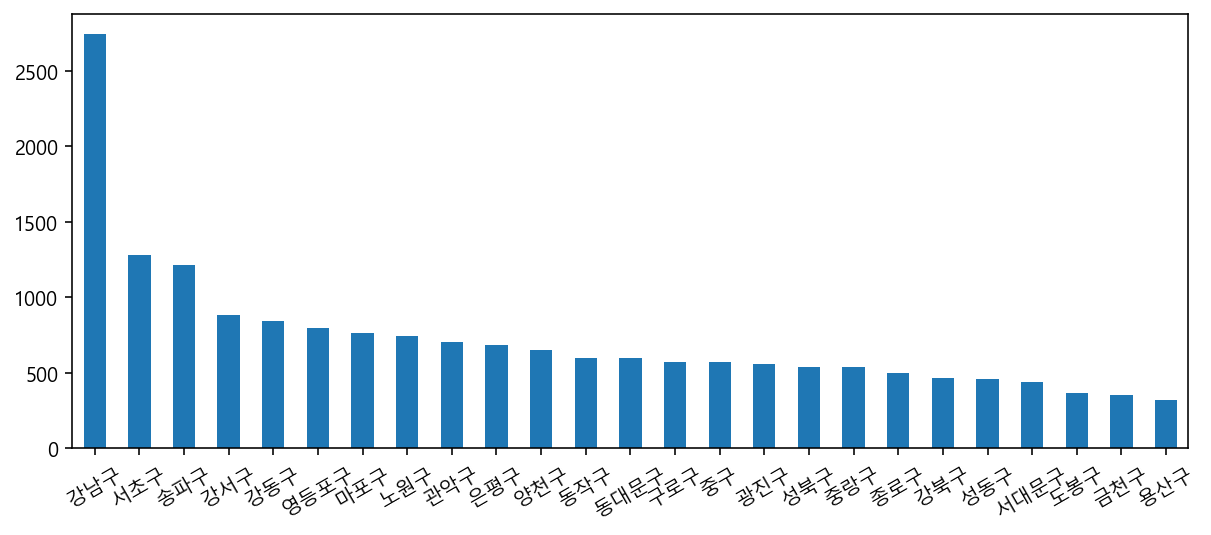

In [63]:
df_seoul["시군구코드명"].value_counts().plot.bar(figsize = (10,4),rot = 30)

<AxesSubplot:xlabel='시군구코드명', ylabel='count'>

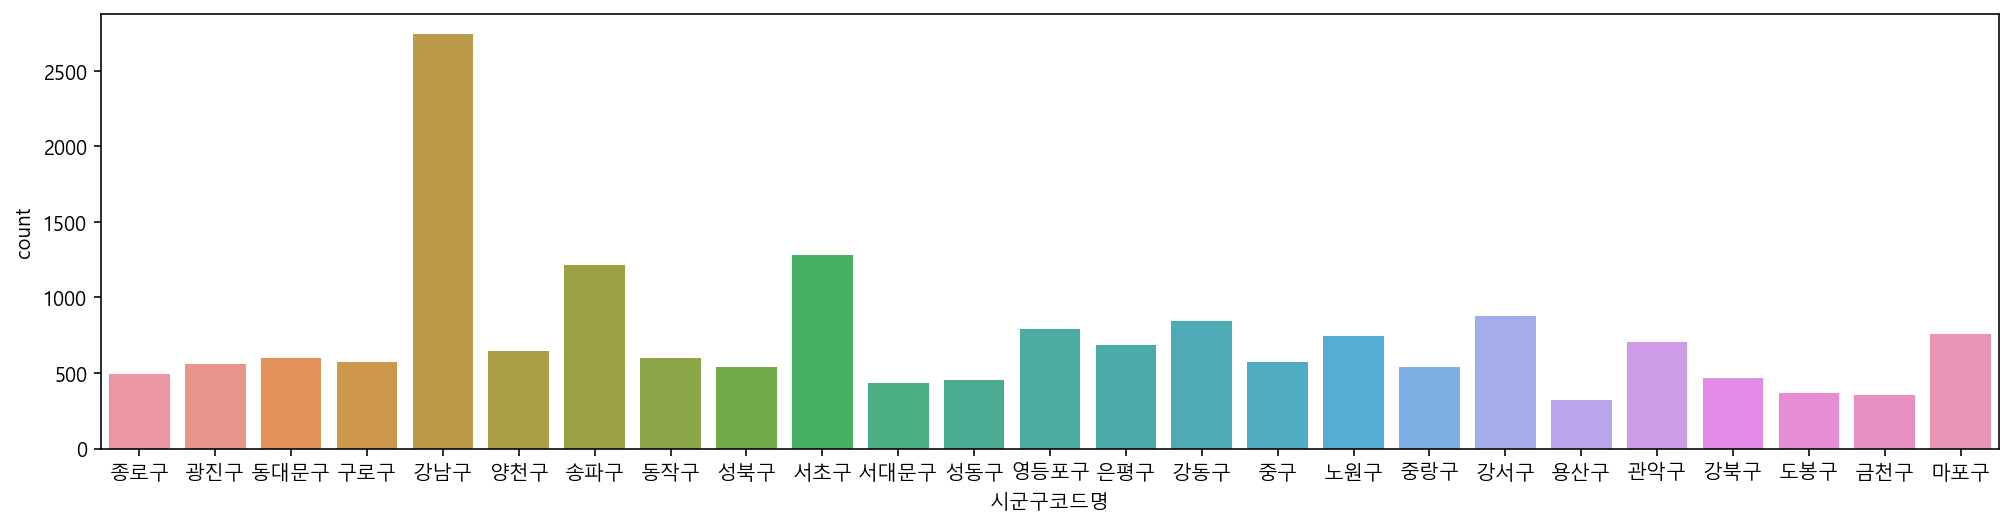

In [66]:
# seaborn의 countplot을 사용해서 df_seoul 데이터프레임의 시군구코드명을 시각화 합니다.
plt.figure(figsize = (17,4))
sns.countplot(data = df_seoul, x = "시군구코드명")

<AxesSubplot:xlabel='x좌표', ylabel='y좌표'>

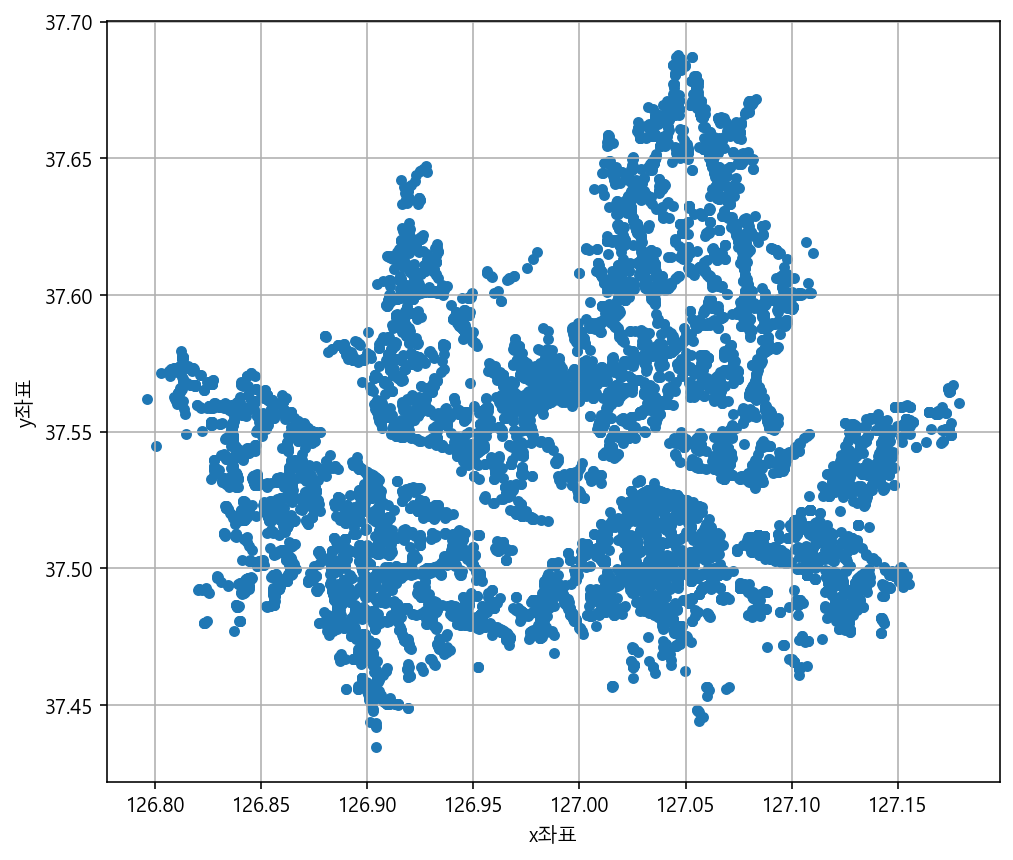

In [71]:
# Pandas의 plot.scatter 를 통해 위도와 경도를 표시해 봅니다.

df_seoul[["x좌표", "y좌표", "시군구코드명"]].plot.scatter(x = "x좌표", y = "y좌표", figsize = (8,7), grid = True)

<AxesSubplot:xlabel='x좌표', ylabel='y좌표'>

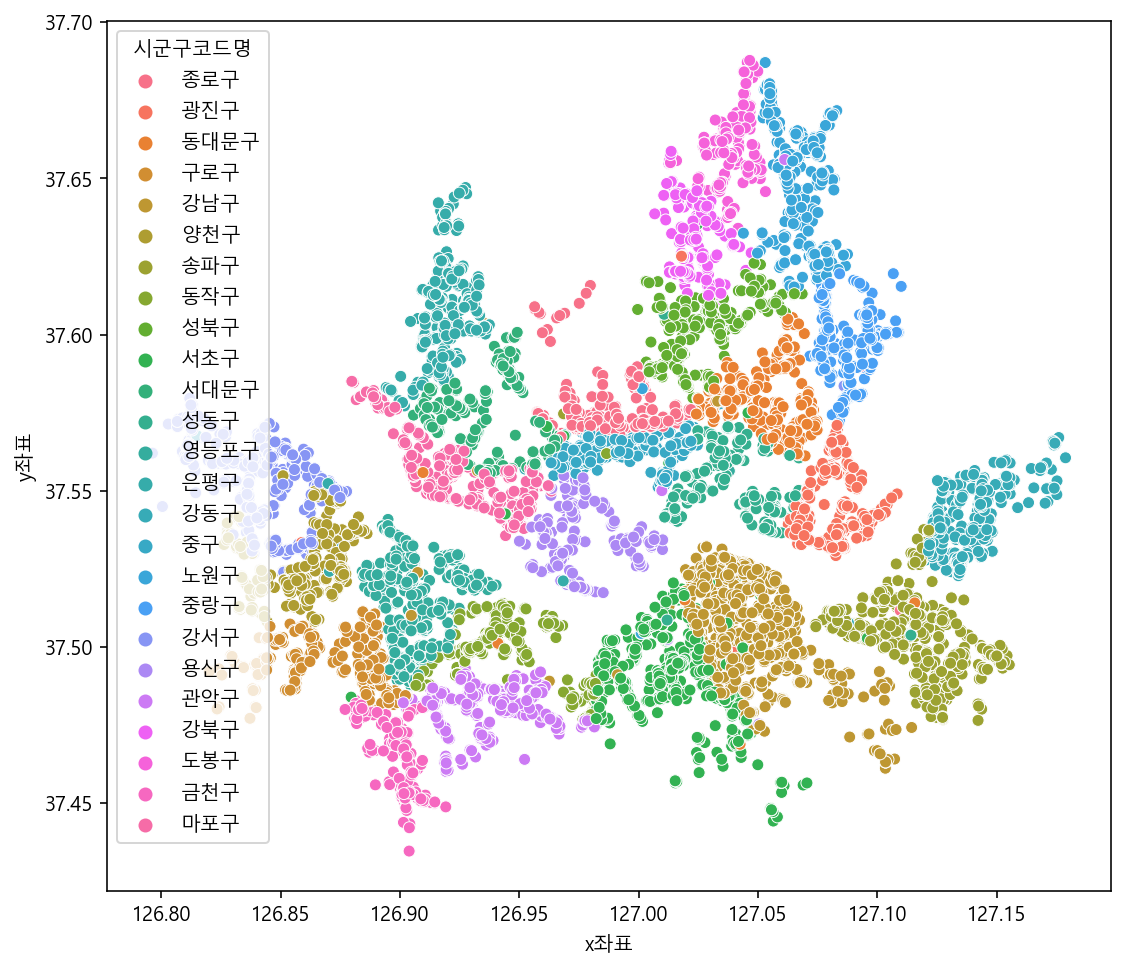

In [74]:
# seaborn의 scatterplot 을 통해 구별 위도와 경도를 표시해 봅니다.
# hue에 컬럼명을 입력하여 해당 값마다 다른 색상을 표시할 수 있습니다.

plt.figure(figsize = (9,8))
sns.scatterplot(data = df_seoul, x = "x좌표", y = "y좌표", hue = "시군구코드명")

<AxesSubplot:xlabel='x좌표', ylabel='y좌표'>

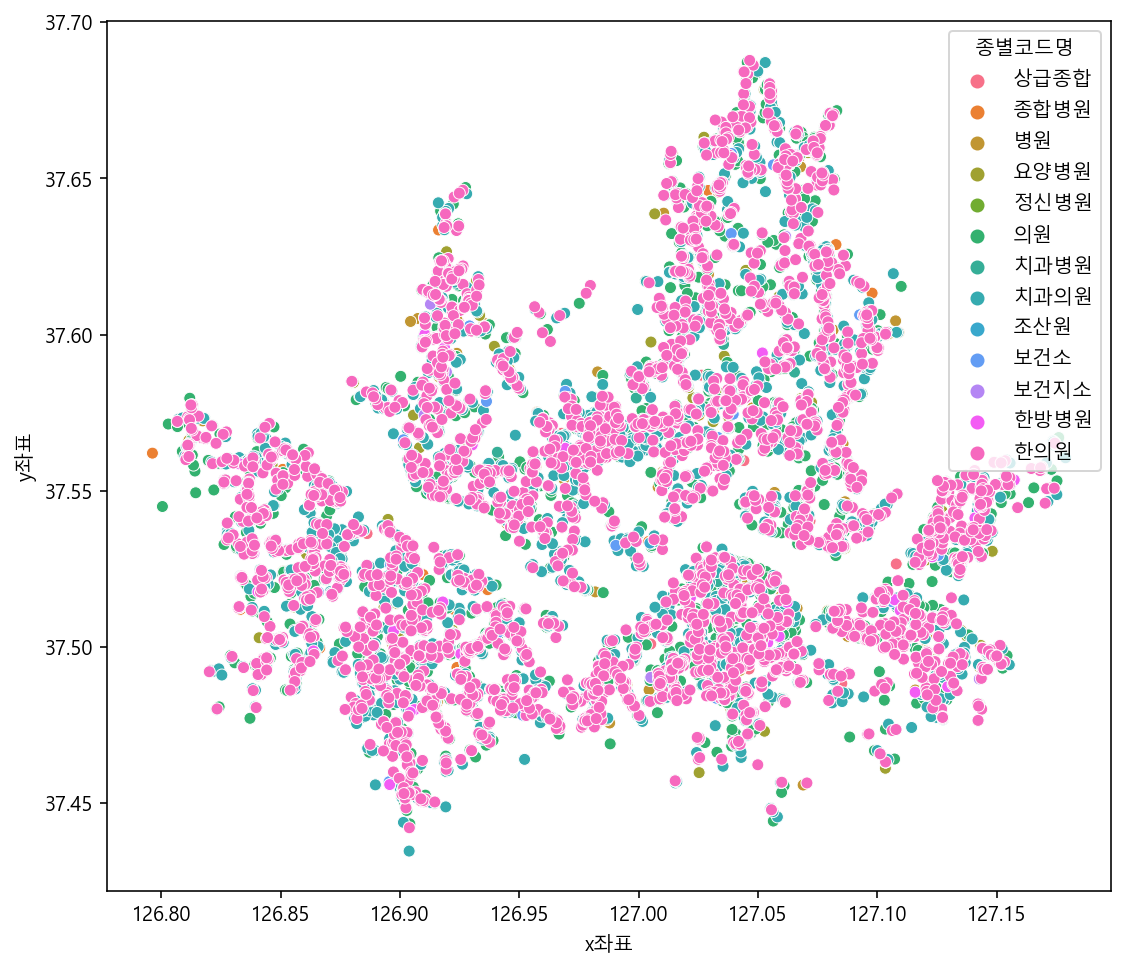

In [75]:
# seaborn의 scatterplot 을 통해 "종별코드명" 위도와 경도를 표시해 봅니다.

plt.figure(figsize = (9,8))
sns.scatterplot(data = df_seoul, x = "x좌표", y = "y좌표", hue = "종별코드명")

<AxesSubplot:xlabel='x좌표', ylabel='y좌표'>

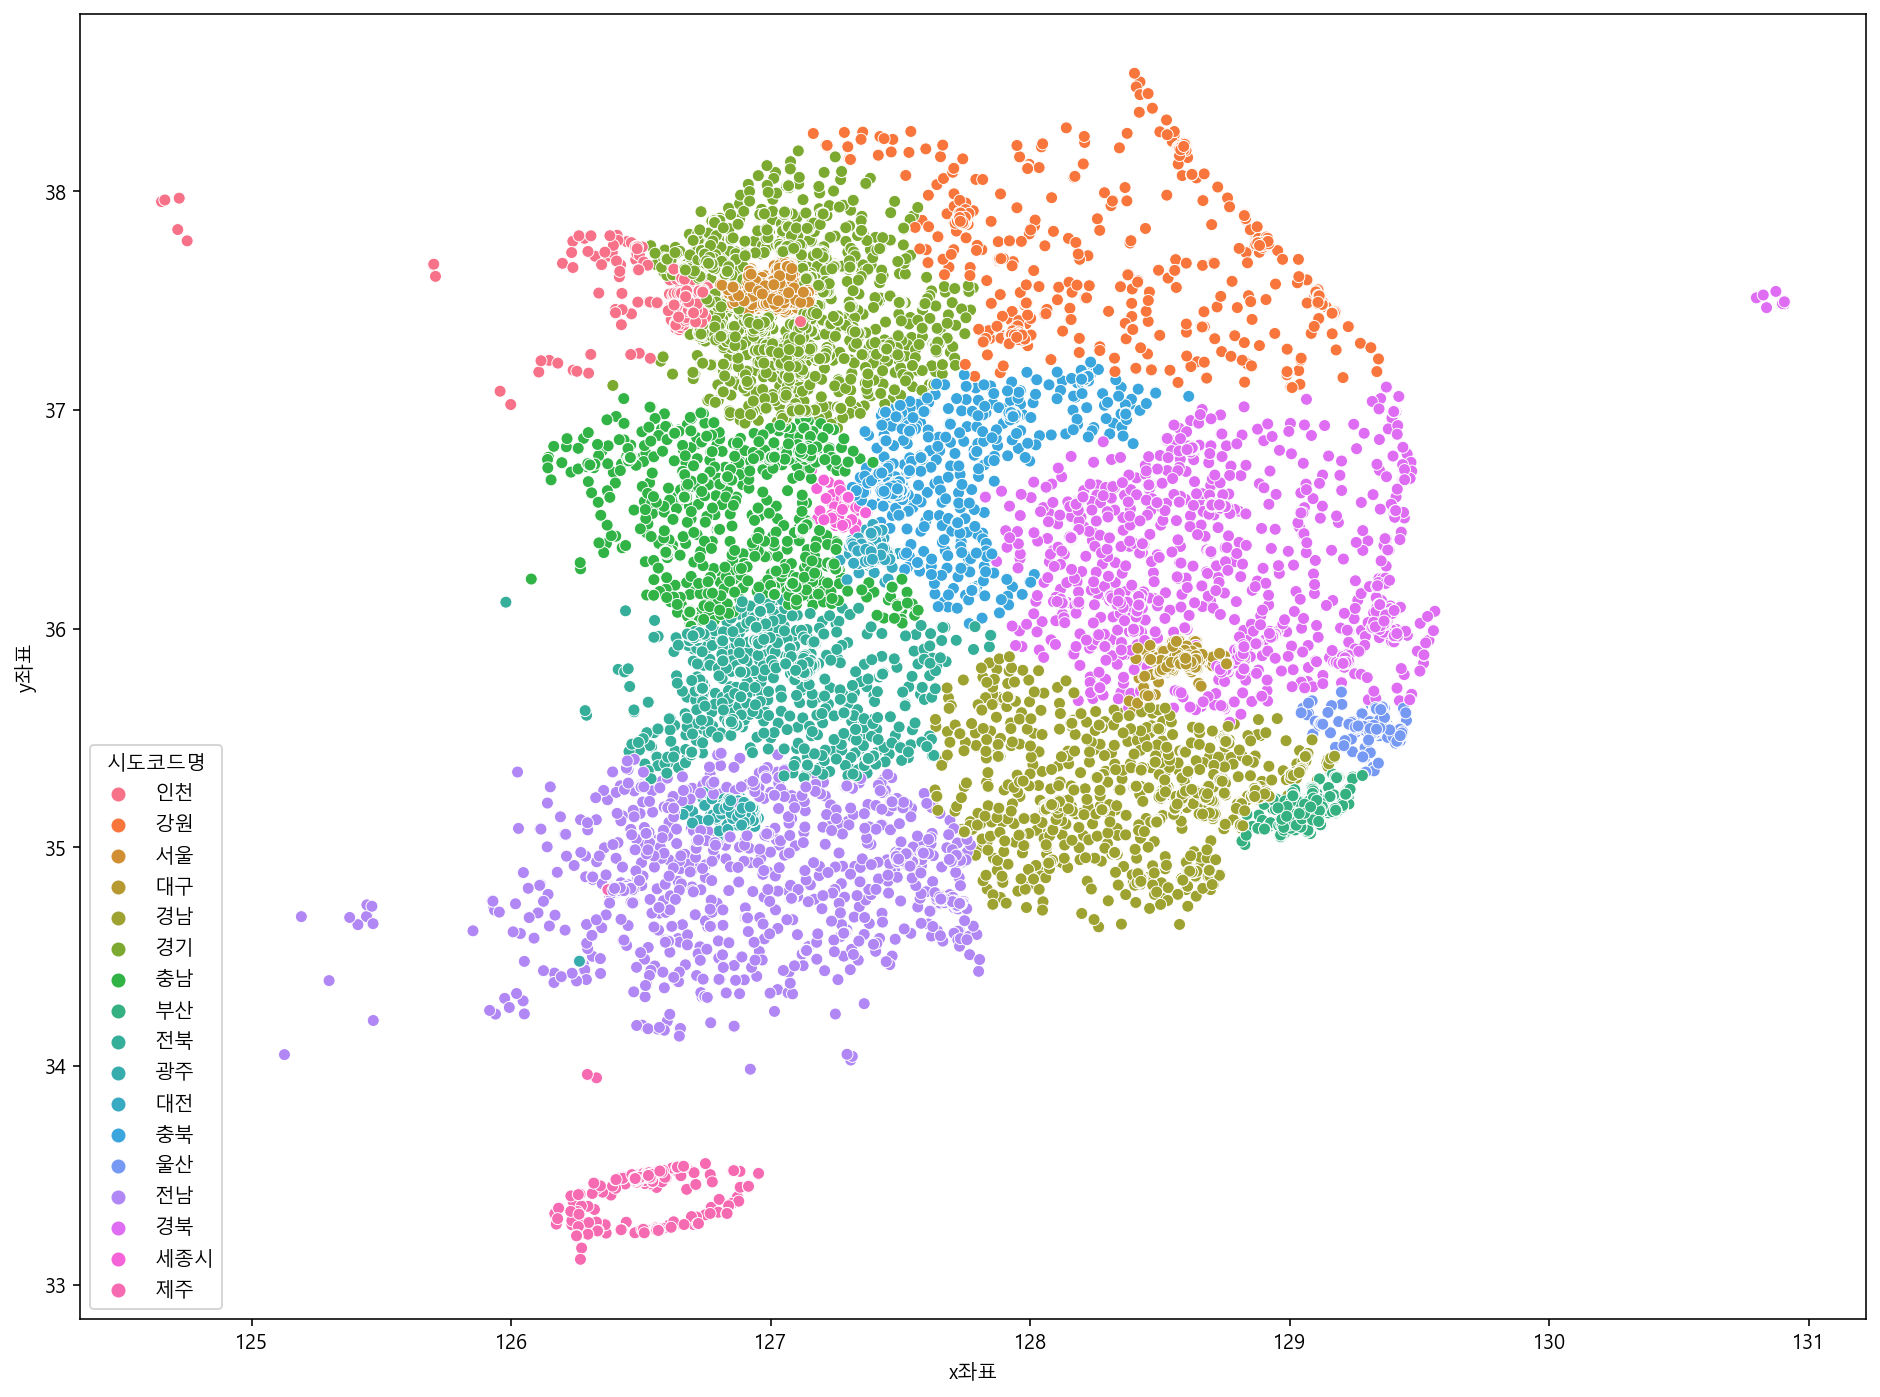

In [77]:
# seaborn의 scatterplot 을 통해 전국 데이터(df)로 위도와 경도를 표시해 봅니다.

plt.figure(figsize = (16,12))
sns.scatterplot(data = df, x = "x좌표", y = "y좌표", hue = "시도코드명")

## Folium 으로 지도 활용하기
- Anaconda prompt 창을 열어 conda 명령어로 설치합니다.
- 프롬프트 창에 아래 명령어를 통해 Folium을 설치합니다.
- conda install -c conda-forge folium

### Folium 사용 예제
- http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [80]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리
import folium

In [81]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.

df_seoul_hospital["y좌표"].mean()
df_seoul_hospital["x좌표"].mean()

126.97888196666666

In [85]:
map = folium.Map(location =[df_seoul_hospital["y좌표"].mean(), df_seoul_hospital["x좌표"].mean()], zoom_start = 12)

for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, "요양기관명"]
    address = df_seoul_hospital.loc[n, "주소"]
    popup = f"{name}-{address}"
    location = df_seoul_hospital.loc[n, "y좌표"], df_seoul_hospital.loc[n, "x좌표"]
    folium.Marker(
        location = location,
        popup = popup,
        ).add_to(map)
map